In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')


In [89]:
df = pd.read_csv('wine.csv')
df.head()

,Classification,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,In [9]:
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Classification                178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [91]:
df.isnull().sum()

Classification                  0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [92]:
df['Classification'].unique()

array([1, 2, 3], dtype=int64)

In [93]:
df.Classification.value_counts().sort_index()

1    59
2    71
3    48
Name: Classification, dtype: int64

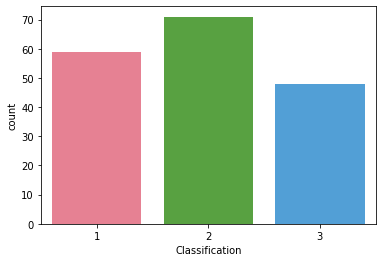

In [94]:
sns.countplot(df['Classification'], palette='husl')

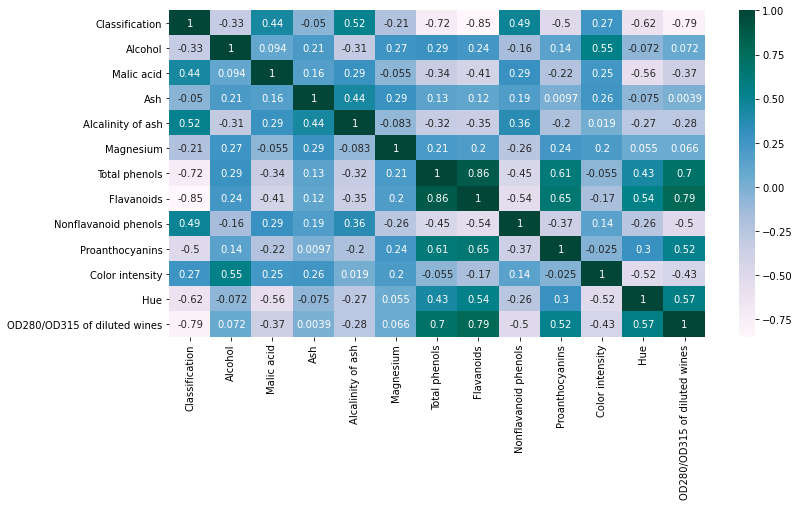

In [95]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap="PuBuGn")

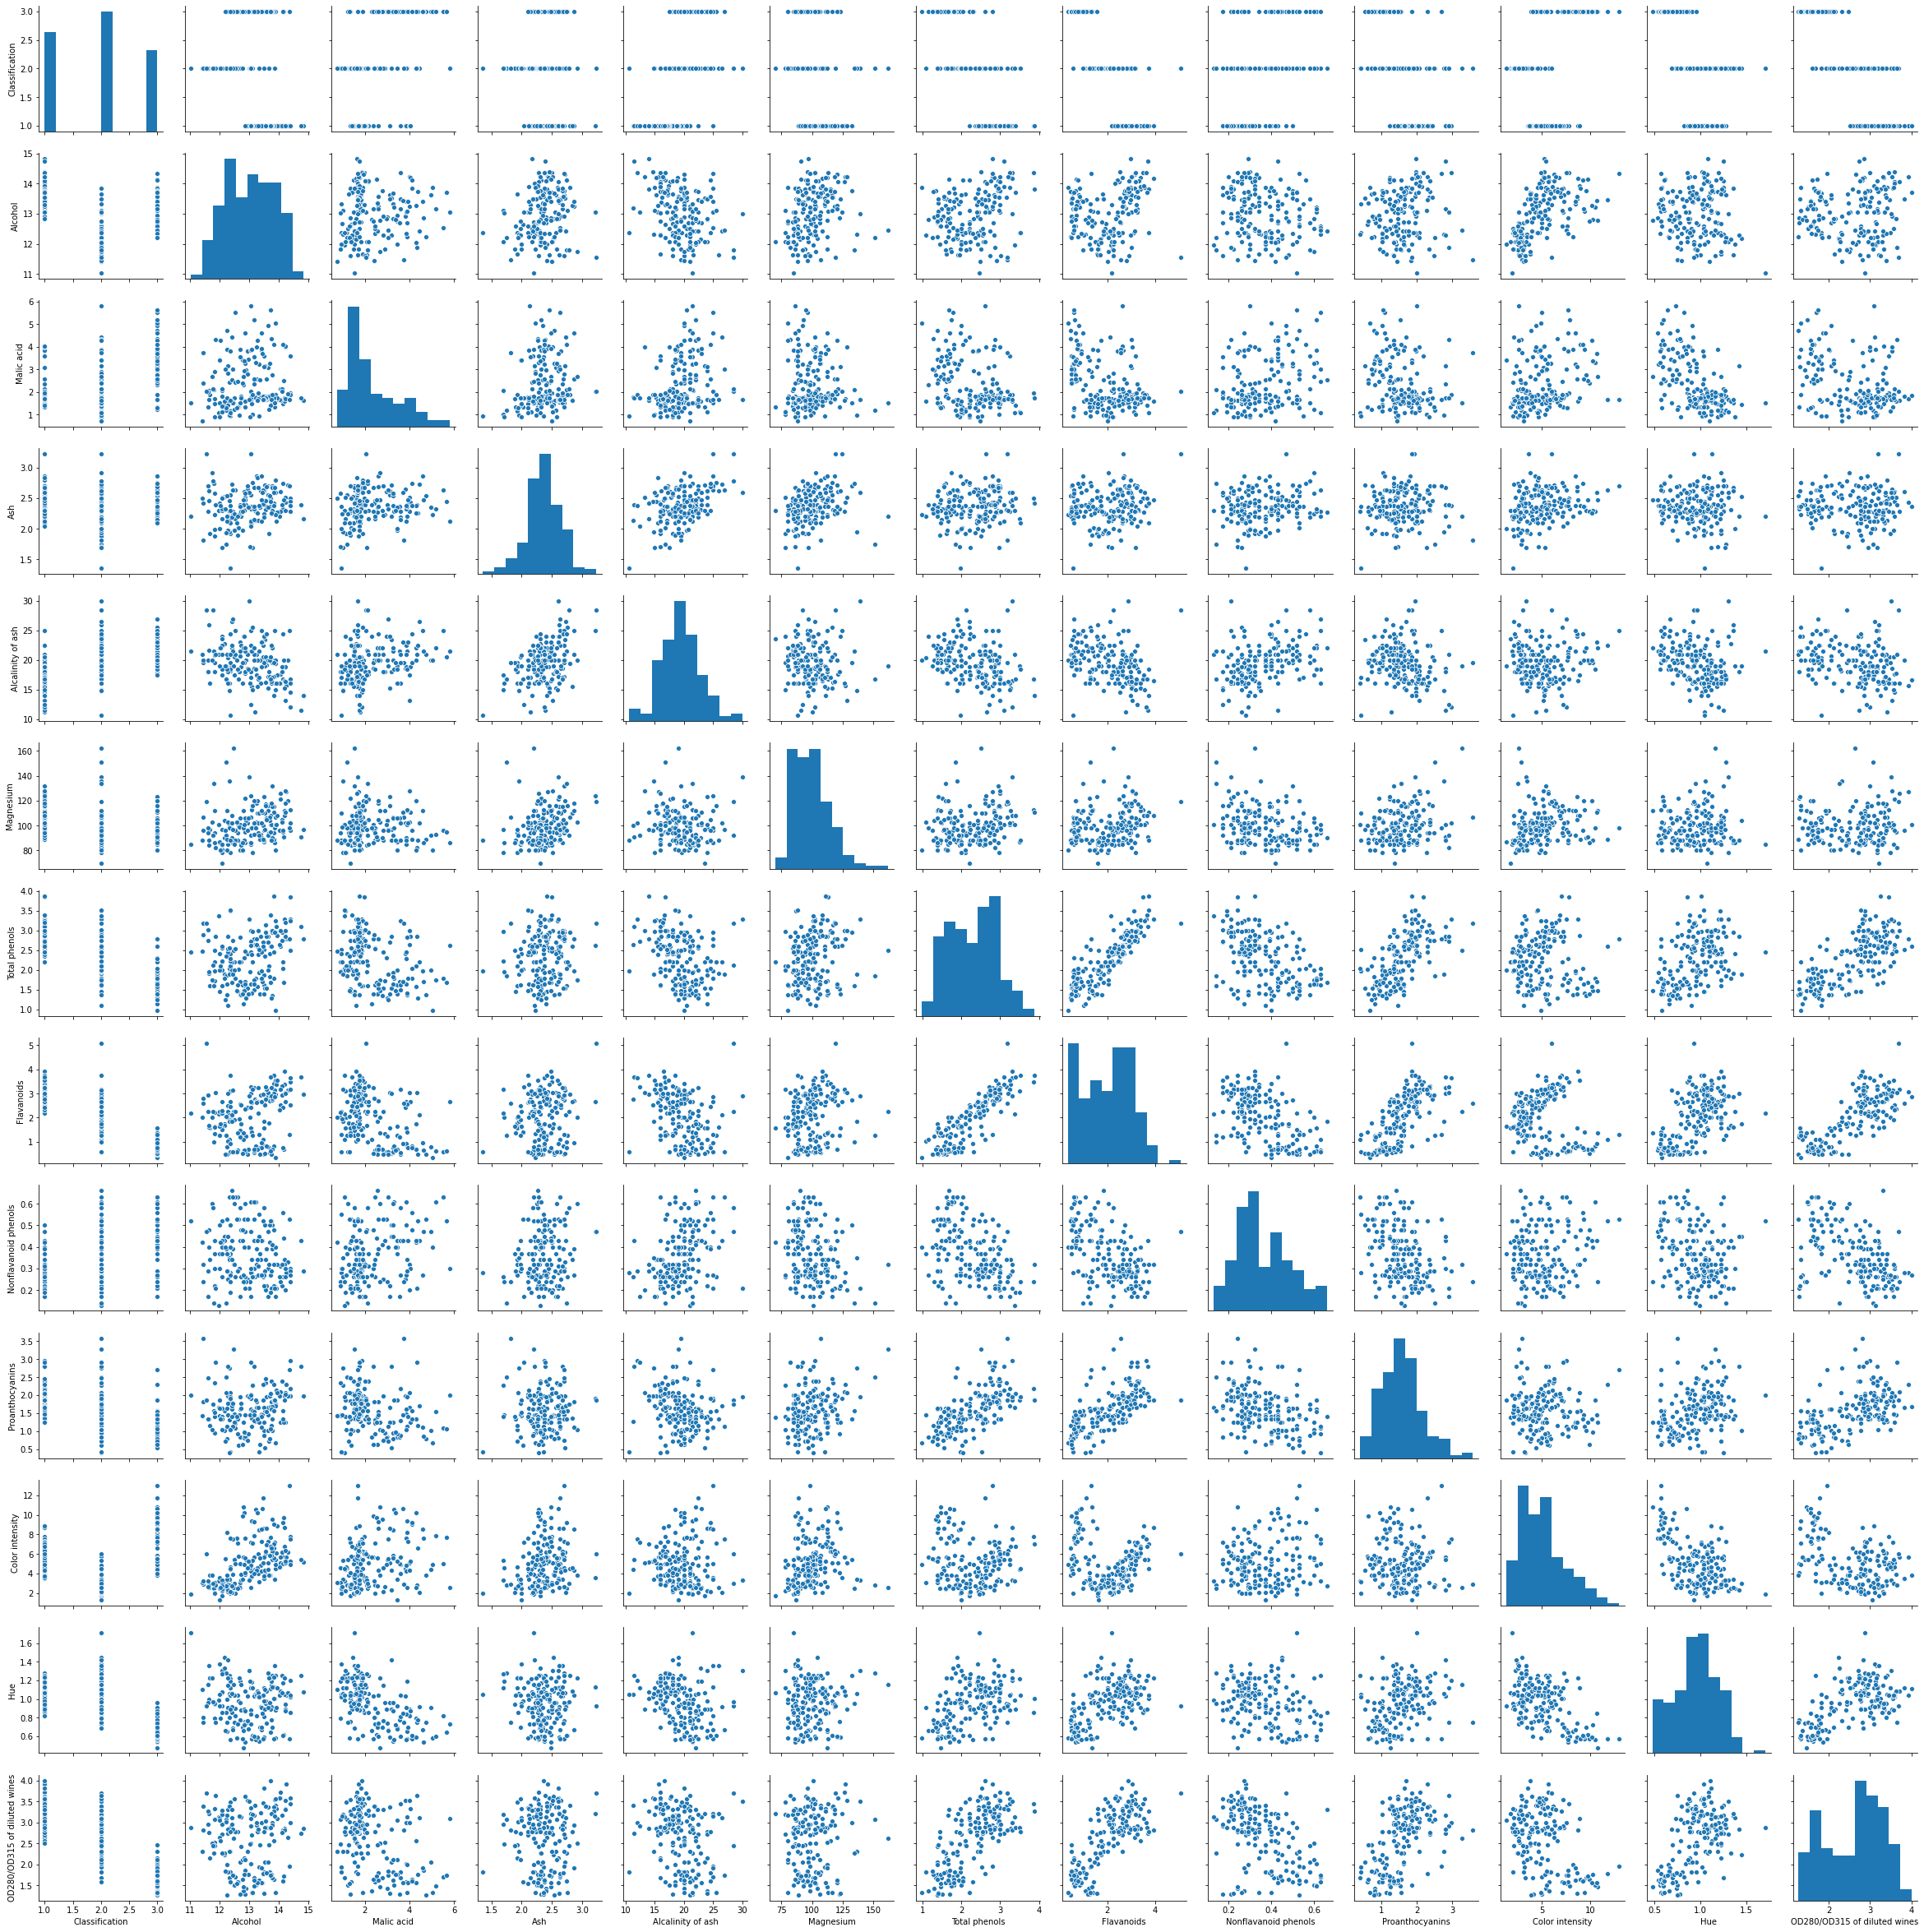

In [96]:
sns.pairplot(df)

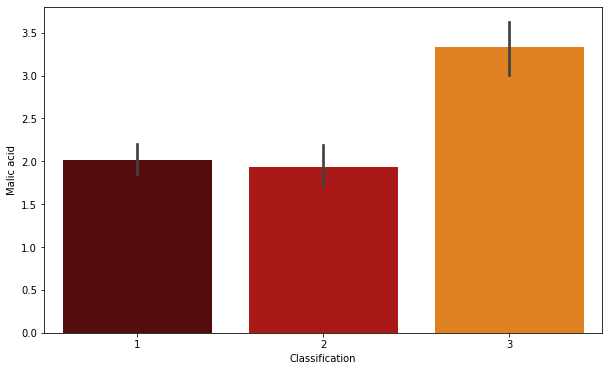

In [97]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x='Classification', y='Malic acid',data=df, palette='gist_heat')

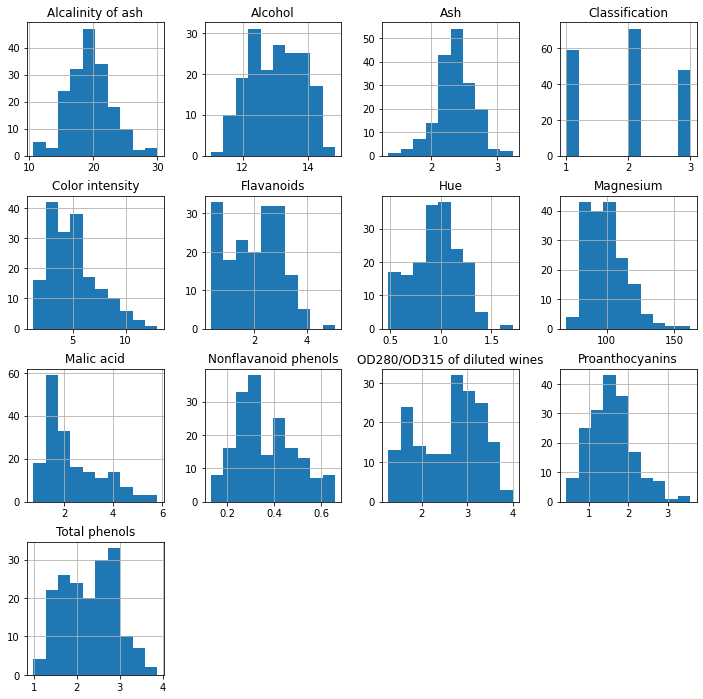

In [98]:
df.hist(figsize=(12,12));

Classification                      AxesSubplot(0.125,0.71587;0.168478x0.16413)
Alcohol                          AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Malic acid                       AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Ash                              AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Alcalinity of ash                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
Magnesium                       AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Total phenols                   AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Flavanoids                      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Nonflavanoid phenols               AxesSubplot(0.125,0.321957;0.168478x0.16413)
Proanthocyanins                 AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Color intensity                 AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Hue                             AxesSubplot(0.731522,0.321957;0.168478x0.16413)
OD280/OD315 of diluted wines          Ax

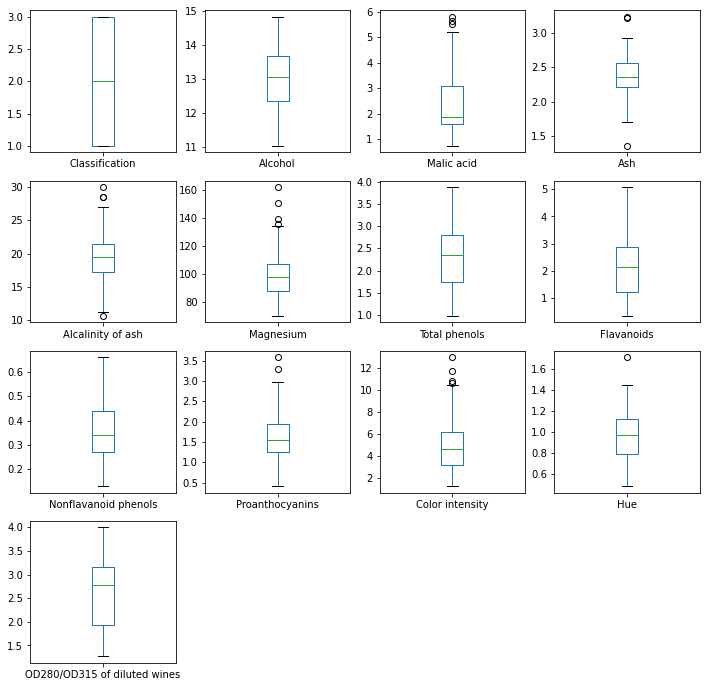

In [99]:
df.plot(kind='box', subplots=True, layout=(4,4), fontsize=10,figsize=(12,12))

In [100]:
array = df.values
x = array[:,1:13]
y = array[:,0]
y=y.astype('int')
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.43, random_state=20)

In [101]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [102]:
x_train.shape

(101, 12)

In [103]:
y_train.shape

(101,)

In [104]:
model=[LogisticRegression(), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(),SVC()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy Score of',m,'is :')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy Score of LogisticRegression() is :
0.974025974025974
[[23  0  0]
 [ 1 35  0]
 [ 0  1 17]]
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       0.97      0.97      0.97        36
           3       1.00      0.94      0.97        18

    accuracy                           0.97        77
   macro avg       0.98      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77



Accuracy Score of GaussianNB() is :
0.961038961038961
[[21  2  0]
 [ 1 35  0]
 [ 0  0 18]]
              precision    recall  f1-score   support

           1       0.95      0.91      0.93        23
           2       0.95      0.97      0.96        36
           3       1.00      1.00      1.00        18

    accuracy                           0.96        77
   macro avg       0.97      0.96      0.96        77
weighted avg       0.96      0.96      0.96        77



Accuracy Score of DecisionTreeClassifier() i